In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from distributed import Client, LocalCluster

from leap_ec.representation import Representation
from leap_ec.ops import tournament_selection, clone, evaluate, pool
from leap_ec.real_rep.initializers import create_real_vector
from leap_ec.real_rep.ops import mutate_gaussian
from leap_ec.probe import print_individual

from leap_ec.multiobjective.problems import SCHProblem
from leap_ec.multiobjective.asynchronous import steady_state_nsga_2

In [2]:
POP_SIZE=50
MAX_BIRTHS=5000

In [3]:
sch_problem = SCHProblem() # Schaffer's Study problem

In [4]:
# We're only going to do a narrow range, which is sufficient for demonstration purposes. The original
# NSGA-II paper explored a wider range.
sch_representation = Representation(initialize=create_real_vector(bounds=[(-10, 10)]))

In [5]:
pipeline = [tournament_selection, # uses domination comparison in MultiObjective.worse_than()
            clone,
            mutate_gaussian(std=0.5, expected_num_mutations=1),
            pool(size=1)
            ]

In [6]:
cluster = LocalCluster(n_workers=15)
client = Client(cluster)

In [7]:
final_pop = steady_state_nsga_2(client, MAX_BIRTHS,
                   pop_size=POP_SIZE, init_pop_size=POP_SIZE,
                   problem=sch_problem,
                   representation=sch_representation,
                   offspring_pipeline=pipeline)

In [8]:
df = pd.DataFrame([(x.genome[0], x.fitness[0], x.fitness[1], x.rank, x.distance) for x in final_pop])
df.columns = ['gene','f1','f2','rank','distance']
df

,gene,f1,f2,rank,distance
0,1.313075,1.724166,0.471866,1,0.079197
1,0.376336,0.141629,2.636285,1,0.082190
2,0.946484,0.895831,1.109897,1,0.086698
3,1.352775,1.830000,0.418900,1,0.080070
4,1.623328,2.635193,0.141882,1,0.077820
5,1.998065,3.992265,0.000004,1,inf
6,1.273719,1.622360,0.527484,1,0.078063
7,1.827686,3.340437,0.029692,1,0.082174
8,0.991991,0.984045,1.016083,1,0.090661
9,0.417102,0.173974,2.505567,1,0.081382


<Axes: xlabel='f1', ylabel='f2'>

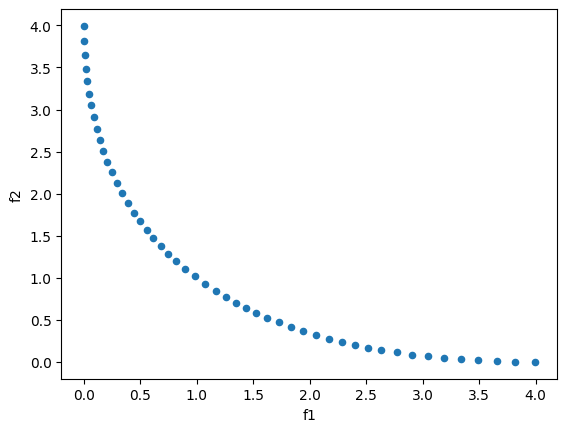

In [9]:
df.plot(x='f1',y='f2', kind='scatter')